<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2026/blob/master/03_01_Vector_Matrix_Norms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAE 5020 – Vector & Matrix Norms (Hands-on Demo)

**Goal:** Build intuition for vector norms (size/error) and matrix norms (amplification).  
We’ll use tiny examples you can *compute by hand* and also visualize.

**You will learn**
- $\|\cdot\|_1, \|\cdot\|_2, \|\cdot\|_\infty$ for vectors
- Induced (operator) matrix norms: $\|A\|_2$ (spectral), $\|A\|_1$, $\|A\|_\infty$
- Frobenius norm $\|A\|_F$ and how it differs from operator norms
- Why norms matter for ROM/SciML: reconstruction error, stability, amplification

---


In [1]:

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)



## 1) Vector norms: “How big is this state/error?”

Let $\mathbf{x} \in \mathbb{R}^n$. Common norms:

$$
\|\mathbf{x}\|_1 = \sum_i |x_i|,\quad
\|\mathbf{x}\|_2 = \sqrt{\sum_i x_i^2},\quad
\|\mathbf{x}\|_\infty = \max_i |x_i|.
$$

Think of $\|\cdot\|_2$ as RMS/energy size, $\|\cdot\|_\infty$ as worst-case peak.


In [2]:

x = np.array([3.0, -4.0, 12.0])
print("x =", x)

n1 = np.linalg.norm(x, 1)
n2 = np.linalg.norm(x, 2)
ninf = np.linalg.norm(x, np.inf)

print("||x||_1   =", n1)
print("||x||_2   =", n2)
print("||x||_inf =", ninf)


x = [ 3. -4. 12.]
||x||_1   = 19.0
||x||_2   = 13.0
||x||_inf = 12.0



### A tiny “CFD-ish” example: error metrics

Suppose $\hat{\mathbf{x}}$ is a ROM prediction and $\mathbf{x}$ is a CFD snapshot.  
Define error $\mathbf{e}=\hat{\mathbf{x}}-\mathbf{x}$. Different norms answer different questions.

- $\|\mathbf{e}\|_2$: overall RMS-like error
- $\|\mathbf{e}\|_\infty$: max error anywhere (hotspot / peak load risk)


In [3]:

x_true = np.array([1.0,  2.0,  3.0,  4.0])
x_rom  = np.array([1.2,  1.8,  2.9,  4.7])
e = x_rom - x_true

print("x_true =", x_true)
print("x_rom  =", x_rom)
print("e      =", e)
print("||e||_2   =", np.linalg.norm(e, 2))
print("||e||_inf =", np.linalg.norm(e, np.inf))


x_true = [1. 2. 3. 4.]
x_rom  = [1.2 1.8 2.9 4.7]
e      = [ 0.2 -0.2 -0.1  0.7]
||e||_2   = 0.761577310586391
||e||_inf = 0.7000000000000002



## 2) Geometry (2D): the unit balls look different

In 2D, the unit sets $\{\mathbf{x}:\|\mathbf{x}\|\le 1\}$ have different shapes:

- $\|\cdot\|_2$: circle
- $\|\cdot\|_1$: diamond
- $\|\cdot\|_\infty$: square

This matters: optimization and regularization behave differently depending on which norm you choose.


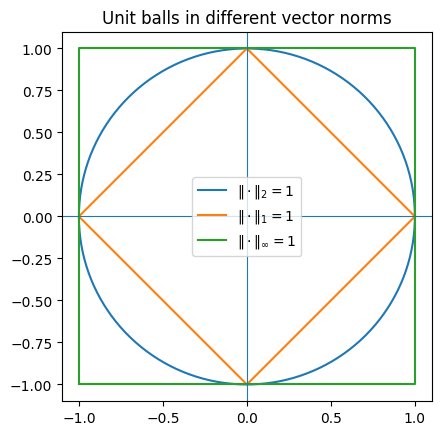

In [4]:

theta = np.linspace(0, 2*np.pi, 600)
circle = np.c_[np.cos(theta), np.sin(theta)]          # ||x||_2 = 1

# For ||x||_inf = 1: square boundary
sq = np.array([
    [-1, -1], [ 1, -1], [ 1,  1], [-1,  1], [-1, -1]
])

# For ||x||_1 = 1: diamond boundary
diamond = np.array([
    [ 1,  0], [ 0,  1], [-1,  0], [ 0, -1], [ 1,  0]
])

plt.figure()
plt.plot(circle[:,0], circle[:,1], label=r"$\|\cdot\|_2=1$")
plt.plot(diamond[:,0], diamond[:,1], label=r"$\|\cdot\|_1=1$")
plt.plot(sq[:,0], sq[:,1], label=r"$\|\cdot\|_\infty=1$")
plt.gca().set_aspect("equal", "box")
plt.axhline(0, linewidth=0.8)
plt.axvline(0, linewidth=0.8)
plt.title("Unit balls in different vector norms")
plt.legend()
plt.show()



## 3) Matrix norms: “How much can this operator amplify an input?”

For a matrix $A$, an **induced/operator norm** is

$$
\|A\| = \max_{\mathbf{x}\neq 0}\frac{\|A\mathbf{x}\|}{\|\mathbf{x}\|}.
$$

This is the *worst-case* amplification.

For the 2-norm:

$$
\|A\|_2 = \sigma_{\max}(A),
$$

the largest singular value (SVD).

Other common induced norms:
- $\|A\|_1$: max absolute column sum  
- $\|A\|_\infty$: max absolute row sum

Also common (but **not** induced):
- Frobenius: $\|A\|_F=\sqrt{\sum_{ij}A_{ij}^2}$


In [5]:

A = np.array([[2.0, 1.0],
              [0.0, 0.5]])

# Induced norms
A1   = np.linalg.norm(A, 1)
A2   = np.linalg.norm(A, 2)      # spectral norm (largest singular value)
Ainf = np.linalg.norm(A, np.inf)

# Frobenius norm
AF   = np.linalg.norm(A, "fro")

print("A =\n", A)
print("||A||_1   (max column sum) =", A1)
print("||A||_2   (largest singular value) =", A2)
print("||A||_inf (max row sum)    =", Ainf)
print("||A||_F   (Frobenius)      =", AF)


A =
 [[2.  1. ]
 [0.  0.5]]
||A||_1   (max column sum) = 2.0
||A||_2   (largest singular value) = 2.247679020649623
||A||_inf (max row sum)    = 3.0
||A||_F   (Frobenius)      = 2.29128784747792



### Amplification experiment: try many directions

We’ll sample many unit vectors $\mathbf{x}$ on the circle ($\|\mathbf{x}\|_2=1$) and compute
$\|A\mathbf{x}\|_2$. The maximum you see should match $\|A\|_2$.


max ||A x||_2 over sampled unit vectors = 2.2476789742923757
||A||_2 (spectral norm)                 = 2.247679020649623


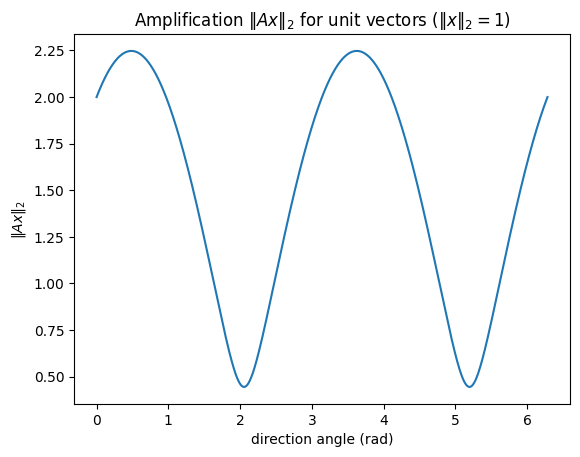

In [6]:

theta = np.linspace(0, 2*np.pi, 2000)
X = np.c_[np.cos(theta), np.sin(theta)]  # unit vectors in 2-norm

Y = (A @ X.T).T
amps = np.linalg.norm(Y, axis=1)         # ||A x||_2 for each x on unit circle

print("max ||A x||_2 over sampled unit vectors =", amps.max())
print("||A||_2 (spectral norm)                 =", np.linalg.norm(A, 2))

plt.figure()
plt.plot(theta, amps)
plt.title(r"Amplification $\|A x\|_2$ for unit vectors ($\|x\|_2=1$)")
plt.xlabel("direction angle (rad)")
plt.ylabel(r"$\|A x\|_2$")
plt.show()



### Visual: circle mapped to an ellipse

Applying a matrix $A$ to all unit vectors maps the unit circle into an ellipse.  
The **largest radius** of that ellipse equals $\|A\|_2$ (largest singular value).


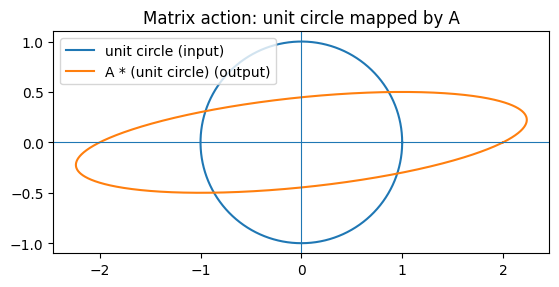

In [7]:

plt.figure()
plt.plot(X[:,0], X[:,1], label="unit circle (input)")
plt.plot(Y[:,0], Y[:,1], label="A * (unit circle) (output)")
plt.gca().set_aspect("equal", "box")
plt.axhline(0, linewidth=0.8)
plt.axvline(0, linewidth=0.8)
plt.title("Matrix action: unit circle mapped by A")
plt.legend()
plt.show()



## 4) Norms and stability: a quick ROM/SciML mindset

Consider a linear time stepping map: $\mathbf{x}_{k+1} = A\mathbf{x}_k$.

A sufficient (not necessary) stability idea is: if $\|A\| < 1$ in a consistent induced norm, then
perturbations shrink under repeated application.

We’ll simulate trajectories for two matrices: one contractive and one amplifying.


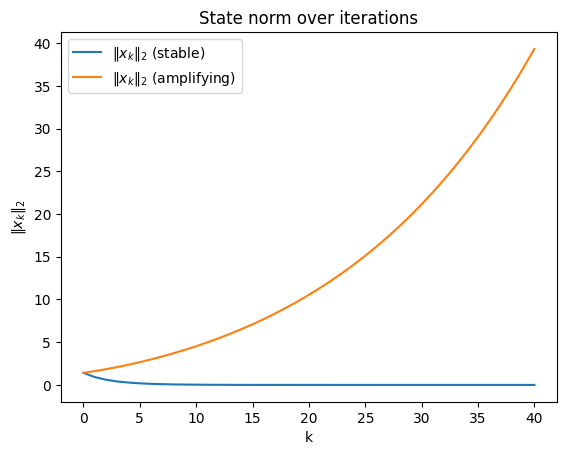

||A_stable||_2   = 0.7
||A_unstable||_2 = 1.1409384379896463


In [8]:

def simulate(A, x0, steps=30):
    xs = [x0]
    x = x0.copy()
    for _ in range(steps):
        x = A @ x
        xs.append(x)
    return np.array(xs)

A_stable = np.array([[0.7, 0.0],
                     [0.0, 0.6]])

A_unstable = np.array([[1.05, 0.2],
                       [0.0,  1.02]])

x0 = np.array([1.0, 1.0])

xs1 = simulate(A_stable, x0, steps=40)
xs2 = simulate(A_unstable, x0, steps=40)

plt.figure()
plt.plot(np.linalg.norm(xs1, axis=1), label=r"$\|x_k\|_2$ (stable)")
plt.plot(np.linalg.norm(xs2, axis=1), label=r"$\|x_k\|_2$ (amplifying)")
plt.title("State norm over iterations")
plt.xlabel("k")
plt.ylabel(r"$\|x_k\|_2$")
plt.legend()
plt.show()

print("||A_stable||_2   =", np.linalg.norm(A_stable, 2))
print("||A_unstable||_2 =", np.linalg.norm(A_unstable, 2))



## 5) Frobenius vs spectral norm (important distinction)

- $\|A\|_2$: worst-case amplification (operator norm)
- $\|A\|_F$: total “energy” of entries

They are related but not the same. For any matrix:
$$
\|A\|_2 \le \|A\|_F.
$$

We’ll verify numerically for random matrices.


In [9]:

rng = np.random.default_rng(0)
for m, n in [(5,5), (10,3), (50,50)]:
    A = rng.standard_normal((m,n))
    s2 = np.linalg.norm(A, 2)
    sf = np.linalg.norm(A, "fro")
    print(f"shape {m}x{n}:  ||A||_2 = {s2:.4f},  ||A||_F = {sf:.4f},  ratio = {s2/sf:.4f}")


shape 5x5:  ||A||_2 = 2.8424,  ||A||_F = 4.2915,  ratio = 0.6623
shape 10x3:  ||A||_2 = 4.0828,  ||A||_F = 5.2537,  ratio = 0.7771
shape 50x50:  ||A||_2 = 13.5328,  ||A||_F = 49.9339,  ratio = 0.2710



## 6) Mini-exercises

1. Pick a vector $\mathbf{x}\in\mathbb{R}^5$. Scale one component by 10×. Which norm changes the most? Why?  
2. Create a diagonal matrix $D=\mathrm{diag}(d_1,\dots,d_n)$. Show that $\|D\|_2=\max_i |d_i|$.  
3. For a random $A$, compare the direction of maximum amplification to the first right singular vector (from SVD).

Try exercise (3) below.


In [10]:

# Exercise (3) scaffold
rng = np.random.default_rng(1)
A = rng.standard_normal((3, 3))

U, s, VT = np.linalg.svd(A)
v1 = VT[0, :]  # first right singular vector

# Check that amplification for x=v1 equals sigma_max
amp_v1 = np.linalg.norm(A @ v1, 2) / np.linalg.norm(v1, 2)

print("A=\n", A)
print("sigma_max =", s[0])
print("amp along v1 =", amp_v1)

# Now brute sample many random directions and compare max amplification
X = rng.standard_normal((20000, 3))
X /= np.linalg.norm(X, axis=1, keepdims=True)
amps = np.linalg.norm((A @ X.T).T, axis=1)

print("max sampled amp =", amps.max())
print("||A||_2         =", np.linalg.norm(A, 2))


A=
 [[ 0.3456  0.8216  0.3304]
 [-1.3032  0.9054  0.4464]
 [-0.537   0.5811  0.3646]]
sigma_max = 1.8879789753451257
amp along v1 = 1.8879789753451253
max sampled amp = 1.8878137045716252
||A||_2         = 1.8879789753451255



---
### Wrap-up

- **Vector norms** measure sizes/errors of states and snapshots.
- **Matrix induced norms** measure worst-case amplification (stability/robustness).
- **Spectral norm = largest singular value** is the workhorse in SVD/POD/DMD contexts.
- **Frobenius norm** is great for “total energy” in entries and ML losses, but not a worst-case operator bound.
